__Liudmila Semenova  
UDACITY Data Analyst Nanodegree Program  
2019, April 16__

# PROJECT 2:  Investigate a Dataset _Medical Appointment No Shows_

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id="intro"></a>Introduction

The subject of this analysis is a Kaggle dataset Medical Appointment No Shows which describes more than 110,000 medical appointments in health units located within the city of Vitoria, Brazil and 14 features of each appointment.

Not all the data were clearly explained by the author in Data Dictionary, however some clarifications provided in the Discussion section allowed to conclude the following about features:

__PatientId__ - identification of a patient.  
__AppointmentID__ - identification of each appointment.  
__Gender__ - gender of a patient: male or female.  
__ScheduledDay__ - a date on which an appointment was scheduled.  
__AppointmentDay__ - a date of an appointment.  
__Age__ - age of a patient.  
__Neighbourhood__ - a neighbourhood where an appointment took place.  
__Scholarship__ - if a patient has government financial aid Bolsa Familia: yes or no.  
__Hipertension__ - if a patient has high blood pressure: yes or no.  
__Diabetes__ - if a patient has diabetes: yes or now.  
__Alcoholism__ - if a patient is suffering from alcoholism: yes or now.  
__Handcap__ - if a patient has disability: the number of all of them.  
__SMS_received__ - if a patient got a text message appointment reminders: yes or no.  
__No-show__ - if a patient came to an appointment: no for "came" and yes for "didn't come".  

Thus, on the basis of these variables, the following questions can be investigated:   
 
1. Are patient no-shows related to a patient's personal features such as age, gender, the mentioned diseases, disabilities or getting government financial aid?

2. Do the appointment reminders affect the coming to the appointment?

3. Is the number of days between the date when the appointment was scheduled and the appointment date related to whether the patient come to the appointment or not?

4. Are there neighbourhoods where the patients are more likely not to miss their appointments?

In [1178]:
# load libraries;
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

# <a id="wrangling"></a>Data Wrangling

## General Properties

At this stage we load in the data and perform several operations to get information about:

- the numbers of rows and columns;
- missing values of each column;
- data types of all columns;
- duplicated rows and duplicated values;
- values of those columns which it possible to check visually.

In [1180]:
# load data, rename colums and check the dataframe; 
labels = ['patient_id', 'app_id', 'gender', 'scheduled', 'appointment', 'age', 'neighbourhood', 'aid', 
          'hypertension', 'diabetes', 'alcoholism', 'disability', 'sms', 'no_show']
df = pd.read_csv('medical_appointment_no_shows.csv', header=0, names = labels)
df.head()

,patient_id,app_id,gender,scheduled,appointment,age,neighbourhood,aid,hypertension,diabetes,alcoholism,disability,sms,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [1181]:
# check dimensions of the dataframe to get the numbers of rows and columns;
df.shape

(110527, 14)

These numbers of rows and columns show a mistake in the dataframe description given by the author on Kaggle.com, where he says about 300,000 medical appointments and 15 variables of each. So we should change this information in the Introduction section.

In [1182]:
# check concise summary of the dataframe;
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id       110527 non-null float64
app_id           110527 non-null int64
gender           110527 non-null object
scheduled        110527 non-null object
appointment      110527 non-null object
age              110527 non-null int64
neighbourhood    110527 non-null object
aid              110527 non-null int64
hypertension     110527 non-null int64
diabetes         110527 non-null int64
alcoholism       110527 non-null int64
disability       110527 non-null int64
sms              110527 non-null int64
no_show          110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The number of non-null values in each column (110527) are equal to the number of the dataframe entries (110527) which means there is no missing data in the dataframe.

In [1183]:
# check if there is any missing data another way;
df.isnull().sum()

patient_id       0
app_id           0
gender           0
scheduled        0
appointment      0
age              0
neighbourhood    0
aid              0
hypertension     0
diabetes         0
alcoholism       0
disability       0
sms              0
no_show          0
dtype: int64

In [1184]:
# check if there any duplicated rows in the dataframe;
sum(df.duplicated())

0

In [1185]:
# check the numbers of unique values in each column;
df.nunique()

patient_id        62299
app_id           110527
gender                2
scheduled        103549
appointment          27
age                 104
neighbourhood        81
aid                   2
hypertension          2
diabetes              2
alcoholism            2
disability            5
sms                   2
no_show               2
dtype: int64

The number of app_id unique values (110527) is equal to the numbers of the dataframe entries but more than the number of patient_id values so we can suggest that some patients had more than one appointment. 

In [1186]:
# check for duplicates in patient_id column;
sum(df.patient_id.duplicated())

48228

The patient_id column has 48,228 duplicate values which confirms the suggestion that many patients had more than one appointment. 

In [1187]:
# check the data for all column except for patient_id, app_id, scheduled and appointment;
print('gender - ', df.gender.unique(), '\n', 
      'age - ', df.age.unique(), '\n',
      'neighbourhood - ', df.neighbourhood.unique(), '\n',
      'aid - ', df.aid.unique(), '\n',
      'hypertension - ', df.hypertension.unique(), '\n',
      'diabetes - ', df.diabetes.unique(), '\n',
      'alcoholism - ', df.alcoholism.unique(), '\n',
      'disability - ', df.disability.unique(), '\n',
      'sms - ', df.sms.unique(), '\n',
      'no_show - ', df.no_show.unique(), sep = '')  

gender - ['F' 'M']
age - [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
neighbourhood - ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UN

In [1188]:
# check data types of each column; 
df.dtypes

patient_id       float64
app_id             int64
gender            object
scheduled         object
appointment       object
age                int64
neighbourhood     object
aid                int64
hypertension       int64
diabetes           int64
alcoholism         int64
disability         int64
sms                int64
no_show           object
dtype: object

In [1189]:
# check object data types more detailed;
print('gender - ', type(df['gender'][0]), '\n', 
      'scheduled - ', type(df['scheduled'][0]), '\n',
      'appointment - ', type(df['appointment'][0]), '\n',
      'neighbourhood - ', type(df['neighbourhood'][0]), '\n',
      'no_show - ', type(df['no_show'][0]), sep = '') 

gender - <class 'str'>
scheduled - <class 'str'>
appointment - <class 'str'>
neighbourhood - <class 'str'>
no_show - <class 'str'>


__Thus, we can conclude the following:__

- the dataset has 110,527 rows and 14 columns;
- there are no missing data or duplicated rows;
- the patient_id column has 48,228 duplicate values;
- the scheduled and appointment columns have string data type instead of datetime;
- the age column has values such as -1 and 0 (-1 seems like a typing error, and 0 means children under one year according the dataframe author explanation);
- the disability column has 5 values for the exact number of patient disabilities which is redundant for further analysis;
- the aid, hypertension, diabetes, alcoholism, sms columns have values 1 and 0 instead of Yes and No.

## Data Cleaning

__Based on the results of the dataframe inspection we perform the next steps to clean the data:__

- drop the row where the age is equal -1;
- convert the scheduled and appointment columns to datetime data type;
- create a new column waiting (days between scheduled and appointment date);
- change the disability column values to binary: 0 for patient without disabilities and 1 for patients with any number of disabilities;
- change aid, hypertension, diabetes, alcoholism, disability, sms columns values to Yes and No for convenience of further calculations and convert these columns to string data type;
- drop app_id column since it is redundant for futher analysis.

In [1190]:
# search the rows where age less than 0;
df.query('age < 0')

,patient_id,app_id,gender,scheduled,appointment,age,neighbourhood,aid,hypertension,diabetes,alcoholism,disability,sms,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [1191]:
# drop the row where age less than 0 and check changes;;
df = df.query('age >= 0')
print(sorted(df.age.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [1192]:
# convert scheduled and appointment columns from object (string) to datetime and drop the time part of values
# as we do not need specific time for the analysis and check changes;;
df['scheduled'] =  pd.to_datetime(df['scheduled']).dt.date
df['appointment'] =  pd.to_datetime(df['appointment']).dt.date
print(type(df['scheduled'][0]), type(df['appointment'][0]))

<class 'datetime.date'> <class 'datetime.date'>


As patients make appointments in advance, values of the scheduled column have to be less than the values of the appointment column or at least equal, so check this condition.

In [1193]:
# search for rows where appointment date are earlier than scheduled date;
df.query('appointment < scheduled')

,patient_id,app_id,gender,scheduled,appointment,age,neighbourhood,aid,hypertension,diabetes,alcoholism,disability,sms,no_show
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


One entry has 6 days difference between scheduled and appointment dates which is no doubt an error. Other dates have only one day differences which can be both an entry error or an error due to missing appointment time. So drop all these rows. 

In [1194]:
# drop the rows where appointment date are earlier than scheduled date and check changes;
df = df.query('appointment >= scheduled')
df.query('appointment < scheduled')

,patient_id,app_id,gender,scheduled,appointment,age,neighbourhood,aid,hypertension,diabetes,alcoholism,disability,sms,no_show


In [1195]:
# create a new column named waiting (days between scheduled and appointment days) and check changes;
df.insert(5, 'waiting', (df.appointment - df.scheduled).dt.days)
df.head()

,patient_id,app_id,gender,scheduled,appointment,waiting,age,neighbourhood,aid,hypertension,diabetes,alcoholism,disability,sms,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [1196]:
# count the naumber of rows whis disabilies equal 2, 3, 4;
(df['disability'] > 1).sum()

199

In [1197]:
# change values 2, 3, 4 in disability column to 1 and check changes; 
df['disability'].replace([2,3,4],[1,1,1], inplace = True)
(df['disability'] > 1).sum()

0

In [1198]:
# change values in aid, hypertension, diabetes, alcoholism, disability, sms columns to Yes and No and check changes; 
def change_to_yes_no(dataframe, col):
    dataframe[col] = dataframe[col].apply(str)
    dataframe[col].replace(['1', '0'], ['Yes', 'No'], inplace = True);

change_to_yes_no(df, 'aid')
change_to_yes_no(df, 'hypertension')
change_to_yes_no(df, 'diabetes')
change_to_yes_no(df, 'alcoholism')
change_to_yes_no(df, 'disability')
change_to_yes_no(df, 'sms')

df.head()

,patient_id,app_id,gender,scheduled,appointment,waiting,age,neighbourhood,aid,hypertension,diabetes,alcoholism,disability,sms,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,No,No,No,No,No,No,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,No,No,No,No,No,No,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,0,8,PONTAL DE CAMBURI,No,No,No,No,No,No,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No


In [1199]:
# drop app_id column and check changes; 
df.drop(['app_id'], axis=1, inplace=True)
df.head()

,patient_id,gender,scheduled,appointment,waiting,age,neighbourhood,aid,hypertension,diabetes,alcoholism,disability,sms,no_show
0,2.987250e+13,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No
1,5.589978e+14,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,No,No,No,No,No,No,No
2,4.262962e+12,F,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,No,No,No,No,No,No,No
3,8.679512e+11,F,2016-04-29,2016-04-29,0,8,PONTAL DE CAMBURI,No,No,No,No,No,No,No
4,8.841186e+12,F,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No


## <a id="eda"></a>Exploratory Data Analysis

At this stage we explore obtained data to answer the research questions which were posed in the Introduction section. 

### __Question 1. Are patient no-shows related to a patient's personal features such as age, gender, hypertension, diabetes, alcoholism, disabilities or getting government financial aid?__

Explore the dataframe in terms of patient features as age, gender, diseases, disabilities and getting financial aid. As many patients had more than one appointment create new dataframe with only the first appointment for each patient to avoid analysing the same patients more than once.

In [1200]:
# drop rows with duplicated patient_id values and check dementions of the new dataframe;
df_patients = df.drop_duplicates(['patient_id'], keep='first')
df_patients.shape

(62298, 14)

#### AGE

Explore patient distribution by gender.

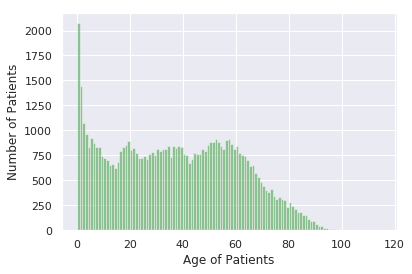

In [1201]:
# patient distribution by age;
sns.distplot(df_patients['age'], bins=115, color='green', kde = False);
plt.xlabel('Age of Patients');
plt.ylabel('Number of Patients');

In [1202]:
# statisctics: mean, min, 25%, 50%, 75% max for age;
df_patients.age.describe()

count    62298.000000
mean        36.705496
std         23.531076
min          0.000000
25%         17.000000
50%         36.000000
75%         56.000000
max        115.000000
Name: age, dtype: float64

As we can see the average age of patients is about 37 y.o., youngest patients are children under 1 y.o. and the oldest patients are 115 y.o. Only 25% patients are children and teenagers and 75% are not older than 56 y.o.

For the further exploration divide the patients into 5 age groups.

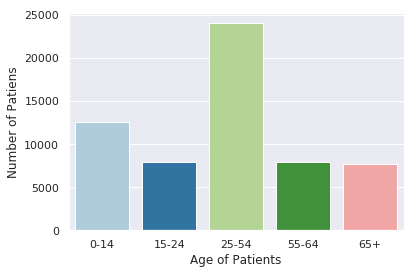

In [1203]:
# cut the age column data into discrete chunks;
age_bin_values = [0, 15, 25, 55, 65, 115]
age_bin_names = ['0-14', '15-24', '25-54', '55-64', '65+']
ages = pd.cut(df_patients.age, bins=age_bin_values, labels=age_bin_names)
sns.countplot(x=ages, palette='Paired').set_xticklabels(age_bin_names);
plt.xlabel('Age of Patients');
plt.ylabel('Number of Patiens');

Explore how many patients from each age group came to their appointments and how many did not come in proportions, then visualize the data.

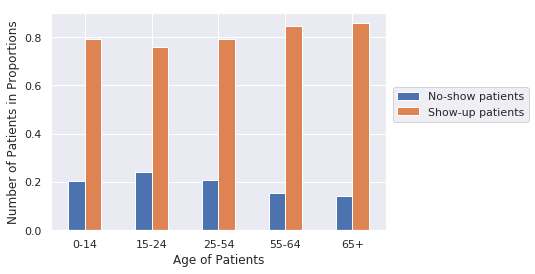

In [1206]:
# divide each age bin into 2 groups: patients who came to the appointment and who did not
# and create new dataframe with obtained data in proportions;
df_age_no_show = df_patients.groupby([pd.cut(df_patients['age'],age_bin_values),'no_show']).count().patient_id.unstack()
df_age_no_show['No-show patients'] = df_age_no_show['Yes'] / (df_age_no_show['Yes'] + df_age_no_show['No'])
df_age_no_show['Show-up patients'] = df_age_no_show['No'] / (df_age_no_show['Yes'] + df_age_no_show['No'])
df_age_no_show.drop(['No', 'Yes'], axis=1, inplace=True)

# visualize the result;
df_age_no_show.plot(kind='bar').set_xticklabels(['0-14', '15-24', '25-54', '55-64', '65+'], rotation=0);
plt.xlabel('Age of Patients');
plt.ylabel('Number of Patients in Proportions');
plt.legend(loc=(1.02, 0.50));

As we can see young patients (aged 15-24) tend to miss their appointments often than other groups of patients. Elderly patients (aged 65 and above) tend to miss the appointments less often than other groups of patients. So we can conclude that the older the patients get, the less likely they will miss the appointments. 

The only exception is children under the age of 15. Since they usually visit doctors accompanied by their parents the relation between missing and not missing appointments should be approximately equal the same relation for adult patients (aged 25-54) which is obtained data confirms.

#### GENDER

Explore patient distribution by gender in absolute numbers and in proportions.

In [1207]:
# patient distribution by gender in absolute numbers;
df_patients.gender.value_counts()

F    40045
M    22253
Name: gender, dtype: int64

In [1208]:
# patient distribution by gender in proportions;
df_patients.gender.value_counts(normalize=True)

F    0.642798
M    0.357202
Name: gender, dtype: float64

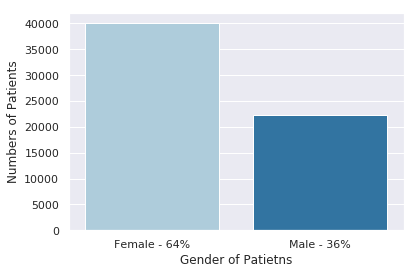

In [1209]:
# visualization of patient distribution by gender;
sns.countplot(x='gender', data=df_patients, palette='Paired').set_xticklabels(['Female - 64%', 'Male - 36%']);
plt.xlabel('Gender of Patietns');
plt.ylabel('Number of Patients');

Explore how many females and males came to their appointments and how many did not come in proportions, then visualize the data.

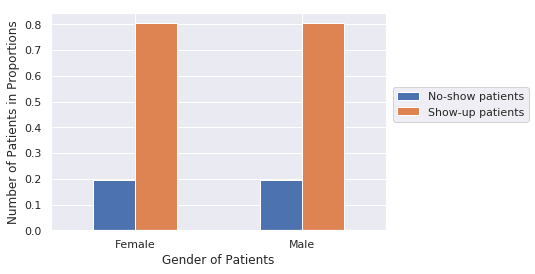

In [1210]:
# get the data how many females and males came to their appointments and how many did not come in proportions;
f_no_show = df_patients.query('gender == "F"').groupby('no_show').size().transform(lambda x: x/x.sum())
m_no_show = df_patients.query('gender == "M"').groupby('no_show').size().transform(lambda x: x/x.sum())

# create dataframe using obtained data;
gender_no_show = [{'No-show patients': f_no_show['Yes'], 'Show-up patients': f_no_show['No']},
                  {'No-show patients': m_no_show['Yes'], 'Show-up patients': m_no_show['No']}]
df_gender_no_show = pd.DataFrame(gender_no_show)
df_gender_no_show.insert(0, 'Gender', ['Female', 'Male'])
df_gender_no_show = df_gender_no_show.set_index('Gender')

# visualize the proportion females and males who came and did not come to their appointments;
df_gender_no_show.plot(kind='bar').set_xticklabels(['Female', 'Male'], rotation = 0);
plt.xlabel('Gender of Patients');
plt.ylabel('Number of Patients in Proportions');
plt.legend(loc=(1.02, 0.50));

As we can see almost equal numbers females and males miss their appointments so we cannot say that there is any relationship between gender and patients no-shows.

#### GOVERNMENT FINANCIAL AID BOLSA FAMILIA

Explore patient distribution by getting government financial aid in absolute numbers and in proportions.

In [1211]:
# patient distribution by getting government financial aid in absolute numbers;
df_patients.aid.value_counts()

No     56510
Yes     5788
Name: aid, dtype: int64

In [1213]:
# patient distribution by getting government financial aid in proportions;
df_patients.aid.value_counts(normalize=True)

No     0.907092
Yes    0.092908
Name: aid, dtype: float64

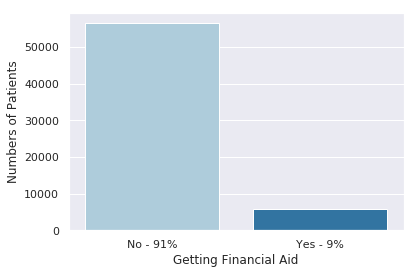

In [1214]:
# visualization of patient distribution by getting government financial aid;
sns.countplot(x='aid', data=df_patients, palette='Paired').set_xticklabels(['No - 91%', 'Yes - 9%']);
plt.xlabel('Getting Financial Aid');
plt.ylabel('Number of Patients');

Explore how many patients who get financial aid and who do not came to their appointments and how many did not in proportions, tnen visualize the data.

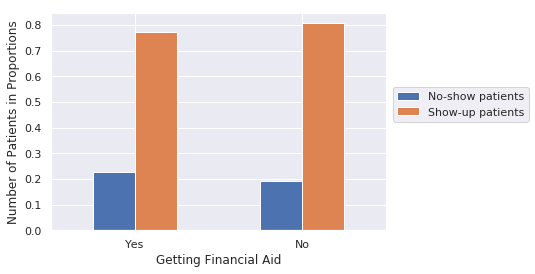

In [1215]:
# get the data how many patients with and without financial aid came to their appointments 
# and how many did not come in proportions;
bf_no_show = df_patients.query('aid == "Yes"').groupby('no_show').size().transform(lambda x: x/x.sum())
nobf_no_show = df_patients.query('aid == "No"').groupby('no_show').size().transform(lambda x: x/x.sum())

# create dataframe using obtained data;
aid_no_show = [{'No-show patients': bf_no_show['Yes'], 'Show-up patients': bf_no_show['No']},
                  {'No-show patients': nobf_no_show['Yes'], 'Show-up patients': nobf_no_show['No']}]
df_aid_no_show = pd.DataFrame(aid_no_show)
df_aid_no_show.insert(0, 'Getting financial aid', ['Yes', 'No'], True)
df_aid_no_show = df_aid_no_show.set_index('Getting financial aid')

# visualize the proportion of patients with and without financial aid 
# who came and did not come to their appointments;
df_aid_no_show.plot(kind='bar').set_xticklabels(['Yes', 'No'], rotation = 0);
plt.xlabel('Getting Financial Aid');
plt.ylabel('Number of Patients in Proportions');
plt.legend(loc=(1.02, 0.50));

As we can see the patients who have financial aid tend slightly often to miss their appointments than the patients who do not have financial aid. However, this difference is not significant and requires further exploration.

#### HYPERTENSION

Explore patient distribution by presence of hypertension in absolute numbers and in proportions.

In [1216]:
# distribution of patients by presence of hypertension in absolute numbers;
df_patients.hypertension.value_counts()

No     50056
Yes    12242
Name: hypertension, dtype: int64

In [1218]:
# distribution of patients by presence of hypertension in proportions;
df_patients.hypertension.value_counts(normalize=True)

No     0.803493
Yes    0.196507
Name: hypertension, dtype: float64

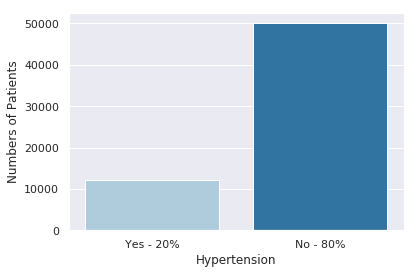

In [1219]:
# distribution of patients by presence of hypertension;
sns.countplot(x='hypertension', data=df_patients, palette='Paired').set_xticklabels(['Yes - 20%', 'No - 80%']);
plt.xlabel('Hypertension');
plt.ylabel('Number of Patients');

Explore how many patients with and without hypertension came and did not come to their appointments in proportions, tnen visualize the data.

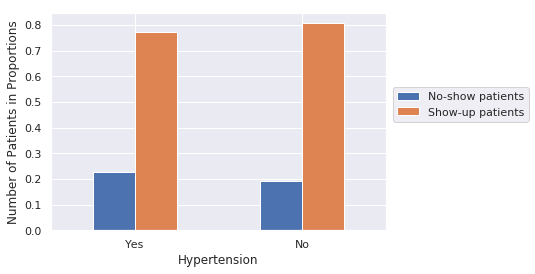

In [1220]:
# get the data how many patients with and without hypertension came to their appointments 
# and how many did not come in proportions;
hyp_no_show = df_patients.query('hypertension == "Yes"').groupby('no_show').size().transform(lambda x: x/x.sum())
nohyp_no_show = df_patients.query('hypertension == "No"').groupby('no_show').size().transform(lambda x: x/x.sum())

# create dataframe using obtained data;
hypertension_no_show = [{'No-show patients': hyp_no_show['Yes'], 'Show-up patients': hyp_no_show['No']},
                  {'No-show patients': nohyp_no_show['Yes'], 'Show-up patients': nohyp_no_show['No']}]
df_hypertension_no_show = pd.DataFrame(hypertension_no_show)
df_hypertension_no_show.insert(0, 'Hypertension', ['Yes', 'No'], True)
df_hypertension_no_show = df_hypertension_no_show.set_index('Hypertension')

# visualize the proportion of patients with and without hypertension who came 
# and did not come to their appointments;
df_aid_no_show.plot(kind='bar').set_xticklabels(['Yes', 'No'], rotation = 0);
plt.xlabel('Hypertension');
plt.ylabel('Number of Patients in Proportions');
plt.legend(loc=(1.02, 0.50));

As we can see the patients with hypertension tend slightly often to miss their appointments than the patients without hypertension. However, this difference is not significant and requires further exploration.

#### DIABETES

Explore patient distribution by presence of diabetes in absolute numbers and in proportions.

In [1221]:
# distribution of patients by presence of diabetes in absolute numbers;
df_patients.diabetes.value_counts()

No     57882
Yes     4416
Name: diabetes, dtype: int64

In [1222]:
# distribution of patients by presence of diabetes in proportions;
df_patients.diabetes.value_counts(normalize=True)

No     0.929115
Yes    0.070885
Name: diabetes, dtype: float64

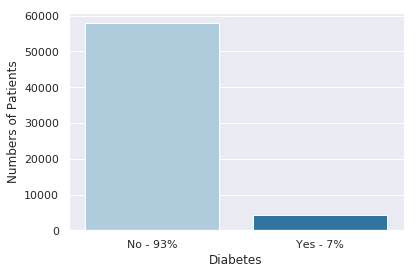

In [1223]:
# distribution of patients by presence of diabetes;
sns.countplot(x='diabetes', data=df_patients, palette='Paired').set_xticklabels(['No - 93%', 'Yes - 7%']);
plt.xlabel('Diabetes');
plt.ylabel('Number of Patients');

Explore how many patients with and without diabetes came and did not come to their appointments in proportions, tnen visualize the data.

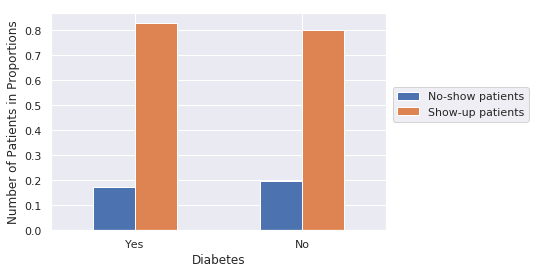

In [1224]:
# get the data how many patients with and without diabetes came to their appointments 
# and how many did not come in proportions;
db_no_show = df_patients.query('diabetes == "Yes"').groupby('no_show').size().transform(lambda x: x/x.sum())
nodb_no_show = df_patients.query('diabetes == "No"').groupby('no_show').size().transform(lambda x: x/x.sum())

# create dataframe using obtained data;
diabetes_no_show = [{'No-show patients': db_no_show['Yes'], 'Show-up patients': db_no_show['No']},
                  {'No-show patients': nodb_no_show['Yes'], 'Show-up patients': nodb_no_show['No']}]
df_diabetes_no_show = pd.DataFrame(diabetes_no_show)
df_diabetes_no_show.insert(0, 'Diabetes', ['Yes', 'No'], True)
df_diabetes_no_show = df_diabetes_no_show.set_index('Diabetes')

# visualize the proportion of patients with and without diabetes who came and did not come to their appointments;
df_diabetes_no_show.plot(kind='bar').set_xticklabels(['Yes', 'No'], rotation = 0);
plt.xlabel('Diabetes');
plt.ylabel('Number of Patients in Proportions');
plt.legend(loc=(1.02, 0.50));

As we can see the patients with diabetes tend slightly less often to miss their appointments than the patients without diabetes. However, this difference is not significant and requires further exploration.

#### ALCOHOLISM

Explore patient distribution by presence of alcoholism in absolute numbers and in proportions.

In [1225]:
# distribution of patients by presence of alcoholism in absolute numbers;
df_patients.alcoholism.value_counts()

No     60792
Yes     1506
Name: alcoholism, dtype: int64

In [1226]:
# distribution of patients by presence of alcoholism in proportions;
df_patients.alcoholism.value_counts(normalize=True)

No     0.975826
Yes    0.024174
Name: alcoholism, dtype: float64

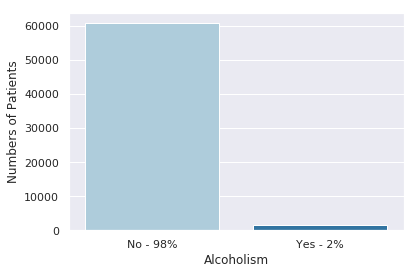

In [1227]:
# distribution of patients by presence of alcoholism;
sns.countplot(x='alcoholism', data=df_patients, palette='Paired').set_xticklabels(['No - 98%', 'Yes - 2%']);
plt.xlabel('Alcoholism');
plt.ylabel('Number of Patients');

Explore how many patients with and without alcoholism who came and did not come to their appointments in proportions, tnen visualize the data.

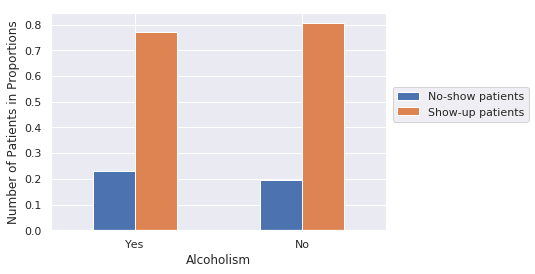

In [1229]:
# get the data how many patients with and without alcoholism came to their appointments 
# and how many did not come in proportions;
alc_no_show = df_patients.query('alcoholism == "Yes"').groupby('no_show').size().transform(lambda x: x/x.sum())
noalc_no_show = df_patients.query('alcoholism == "No"').groupby('no_show').size().transform(lambda x: x/x.sum())

# create dataframe using obtained;
alcoholism_no_show = [{'No-show patients': alc_no_show['Yes'], 'Show-up patients': alc_no_show['No']},
                  {'No-show patients': noalc_no_show['Yes'], 'Show-up patients': noalc_no_show['No']}]
df_alcoholism_no_show = pd.DataFrame(alcoholism_no_show)
df_alcoholism_no_show.insert(0, 'Alcoholism', ['Yes', 'No'], True)
df_alcoholism_no_show = df_alcoholism_no_show.set_index('Alcoholism')

# visualize the proportion of patients with and without alcoholism who came and did not come to their appointments;
df_alcoholism_no_show.plot(kind='bar').set_xticklabels(['Yes', 'No'], rotation = 0);
plt.xlabel('Alcoholism');
plt.ylabel('Number of Patients in Proportions');
plt.legend(loc=(1.02, 0.50));

As we can see the patients with alcoholism tend slightly often to miss their appointments than the patients without alcoholism. However, this difference is not significant and requires further exploration.

#### DISABILITY

Explore patient distribution by presence of disability in absolute numbers and in proportions.

In [1230]:
# distribution of patients by presence of disability in absolute numbers;
df_patients.disability.value_counts(normalize=True)

No     0.981813
Yes    0.018187
Name: disability, dtype: float64

In [1231]:
# distribution of patients by presence of disability in proportions;
df_patients.disability.value_counts(normalize=True)

No     0.981813
Yes    0.018187
Name: disability, dtype: float64

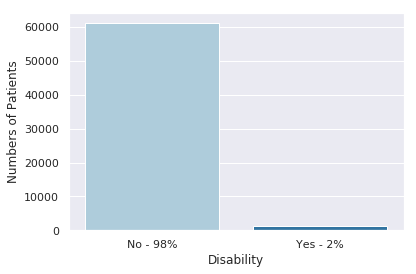

In [1232]:
# distribution of patients by presence of disability;
sns.countplot(x='disability', data=df_patients, palette='Paired').set_xticklabels(['No - 98%', 'Yes - 2%']);
plt.xlabel('Disability');
plt.ylabel('Number of Patients');

Explore how many patients with and without disabilities came and did not come to their appointments in proportions, tnen visualize the data.

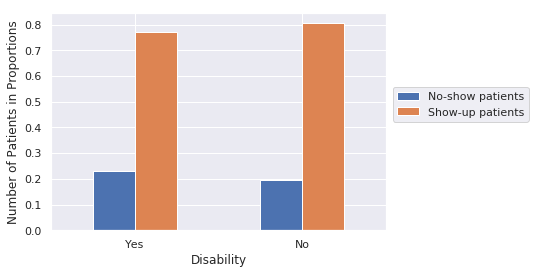

In [1233]:
# get the data how many patients with and without disabilities came to their appointments 
# and how many did not come in proportions;
dis_no_show = df_patients.query('disability == "Yes"').groupby('no_show').size().transform(lambda x: x/x.sum())
nodis_no_show = df_patients.query('disability == "No"').groupby('no_show').size().transform(lambda x: x/x.sum())

# create dataframe using obtained data;
disability_no_show = [{'No-show patients': dis_no_show['Yes'], 'Show-up patients': dis_no_show['No']},
                  {'No-show patients': nodis_no_show['Yes'], 'Show-up patients': nodis_no_show['No']}]
df_disability_no_show = pd.DataFrame(alcoholism_no_show)
df_disability_no_show.insert(0, 'Disability', ['Yes', 'No'], True)
df_disability_no_show = df_disability_no_show.set_index('Disability')

# visualize the proportion of patients with and without disabilities who came 
# and did not come to their appointments;
df_disability_no_show.plot(kind='bar').set_xticklabels(['Yes', 'No'], rotation = 0);
plt.xlabel('Disability');
plt.ylabel('Number of Patients in Proportions');
plt.legend(loc=(1.02, 0.50));

As we can see the patients with disabilities tend slightly often to miss their appointments than the patients without disabilities. However, this difference is not significant and requires further exploration.

### Question 2. Do the appointment reminders affect the coming to the appointment?

Explore the appointment distribution by numbers of the appointment reminders. As it does not matter for this analysis if the appointment was first or follow-up we should use the original dataframe with non-unique patients.

In [655]:
# check how many appointments were preceded by sms and how many were not in absolute number;
df.sms.value_counts()

No     75039
Yes    35482
Name: sms, dtype: int64

In [1234]:
# check how many appointments were preceded by sms and how many were not in proportions;
df.sms.value_counts(normalize=True)

No     0.678957
Yes    0.321043
Name: sms, dtype: float64

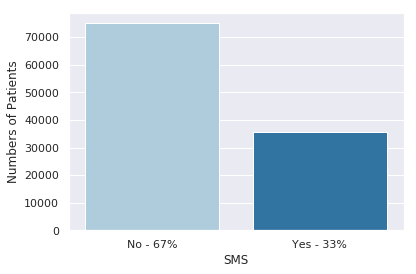

In [1235]:
# visualize ow many appointments were preceded by sms and how many were not;
sns.countplot(x='sms', data=df, palette='Paired').set_xticklabels(['No - 67%', 'Yes - 33%']);
plt.xlabel('SMS');
plt.ylabel('Number of Patients');

Explore how many appointments with and without sms were missed and were not missed by patients in proportions, then visualize the data.

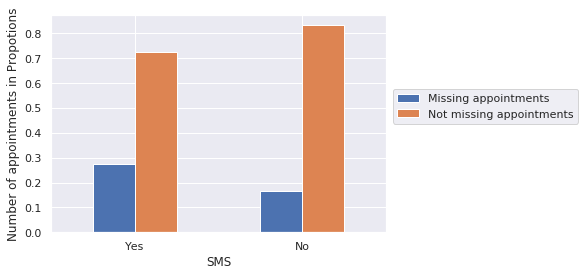

In [1236]:
# get the data how many appointments with and without sms were missed and were not missed by patients in proportions;
sms_no_show = df.query('sms == "Yes"').groupby('no_show').size().transform(lambda x: x/x.sum())
nosms_no_show = df.query('sms == "No"').groupby('no_show').size().transform(lambda x: x/x.sum())

# create dataframe using obtained data;
sms_no_show = [{'Missing appointments': sms_no_show['Yes'], 'Not missing appointments': sms_no_show['No']},
                  {'Missing appointments': nosms_no_show['Yes'], 'Not missing appointments': nosms_no_show['No']}]
df_sms_no_show = pd.DataFrame(sms_no_show)
df_sms_no_show.insert(0, 'SMS', ['Yes', 'No'], True)
df_sms_no_show = df_sms_no_show.set_index('SMS')

# visualize the proportion of appointments with and without sms which were missed and were not;
df_sms_no_show.plot(kind='bar').set_xticklabels(['Yes', 'No'], rotation = 0);
plt.ylabel('Number of appointments in Propotions');
plt.xlabel('SMS');
plt.legend(loc=(1.02, 0.50));

As we can see the appointments preceded by sms were missed noticeably more than the appointments without sms. So according obtained results the appointment reminders are more related to the patient no-shows.

### Question 3. Is the number of days between the date when the appointment was scheduled and the appointment date related to whether the patient come to the appointment or not?

Explore the appointment distribution by days between the scheduled and the appointment dates. As it does not matter for this analysis if the appointment was first or follow-up we should use the original dataframe with non-unique patients.

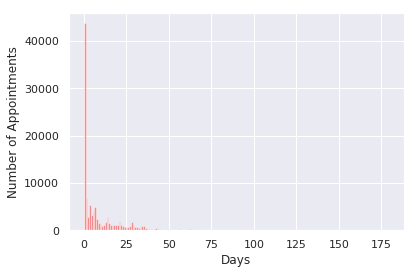

In [995]:
# patient distribution by age;
sns.distplot(df['waiting'], bins=175, color='red', kde = False);
plt.ylabel('Number of Appointments');
plt.xlabel('Days');

In [996]:
# statisctics: mean, min, 25%, 50%, 75% max for age;
df.waiting.describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting, dtype: float64

As we can see the average waiting time (days between the scheduled and the appointment dates) is about 10 days although about 25% of patients can visit the doctor on the same day. While the maximum waiting time is 179 days, 75% of patients wait for the appointment not longer than 15 days.

For the further exploration divide waiting days into 5 groups by time of waiting.

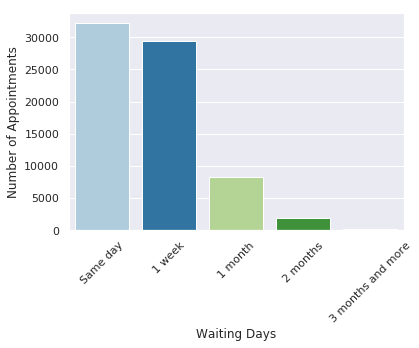

In [1002]:
# cut the waiting column data into discrete chunks;
waiting_bin_values = [0, 7, 30, 60, 90, 180]
waiting_bin_names = ['Same day', '1 week', '1 month', '2 months', '3 months and more']
waiting = pd.cut(df.waiting, bins = waiting_bin_values, labels = waiting_bin_names)
sns.countplot(x=waiting, palette='Paired').set_xticklabels(waiting_bin_names, rotation = 45);
plt.ylabel('Number of Appointments');
plt.xlabel('Waiting Days');

Explore how many patients from each waiting days group came to their appointments and how many did not come in proportions, then visualize the data.

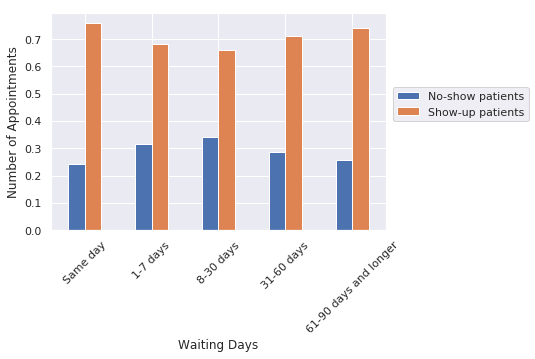

In [1238]:
# divide each age bin into 2 groups: patients who came to the appointment and who did not
# and create new dataframe with obtained data in proportions;
df_waiting_no_show = df.groupby([pd.cut(df['waiting'],waiting_bin_values),'no_show']).count().patient_id.unstack()
df_waiting_no_show['No-show patients'] = df_waiting_no_show['Yes'] / (df_waiting_no_show['Yes'] + df_waiting_no_show['No'])
df_waiting_no_show['Show-up patients'] = df_waiting_no_show['No'] / (df_waiting_no_show['Yes'] + df_waiting_no_show['No'])
df_waiting_no_show.drop(['No', 'Yes'], axis=1, inplace=True)

# visualize the result;
df_waiting_no_show.plot(kind='bar').set_xticklabels(['Same day', '1-7 days', '8-30 days', '31-60 days', '61-90 days and longer'], rotation=45);
plt.xlabel('Waiting Days');
plt.ylabel('Number of Appointments');
plt.legend(loc=(1.02, 0.50));

As we can see the patients who can visit clinics at the day when they scheduled the appointment tend to miss the appointment less often than the patients who have to wait longer. The patients who have to wait more than one week but less than one months miss their appointments more often than other patients. However, after a month of waiting the longer patients wait the less they tend to miss their appointments.

### Question 4. Are there neighbourhoods where the patients are more likely not to miss their appointments?

Explore the neighbourhoods distribution by number of appointments. As it does not matter for this analysis if the appointment was first or follow-up we should use the original dataframe with non-unique patients.

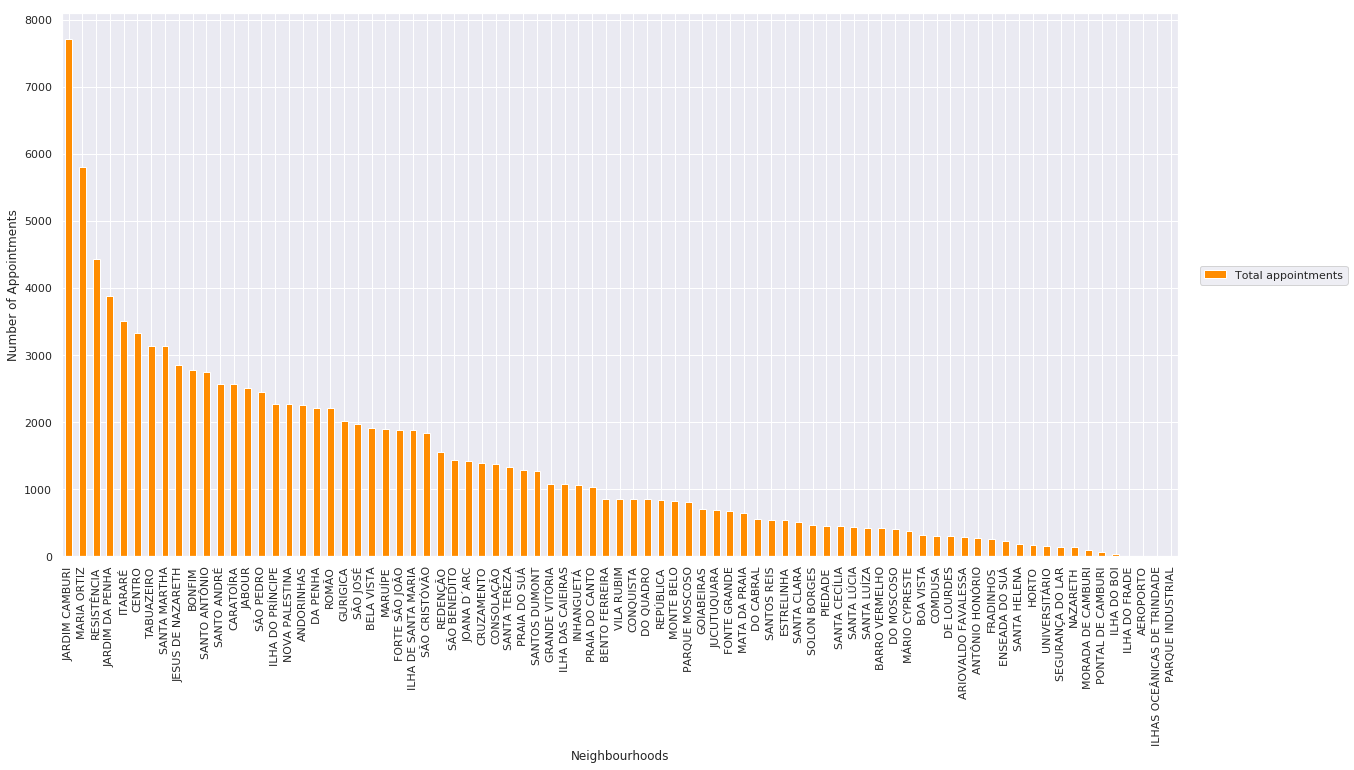

In [1239]:
# get the data how many appointments were scheduled in clinics of each neighbourhoods in absolute numbers;
df_neigh_total=df.groupby(['neighbourhood','no_show']).count().patient_id.unstack().fillna(0)
df_neigh_total['Total appointments'] = df_neigh_total['Yes'] + df_neigh_total['No']
df_neigh_total.drop(['Yes','No'], axis=1, inplace=True)
df_neigh_total.sort_values('Total appointments', ascending = False, inplace = True)

# visualize the result;
df_neigh_total.plot(kind='bar', figsize=(20,10), color='DarkOrange');
plt.xlabel('Neighbourhoods');
plt.ylabel('Number of Appointments');
plt.legend(loc=(1.02, 0.50));

Jardim Camburi is the neighbourhood where clinics with the largest number of scheduled appointments are located. However some of them could have been missed. So we should analyse in what neighbourhood clinics with the largest number of not missing appointments are located.

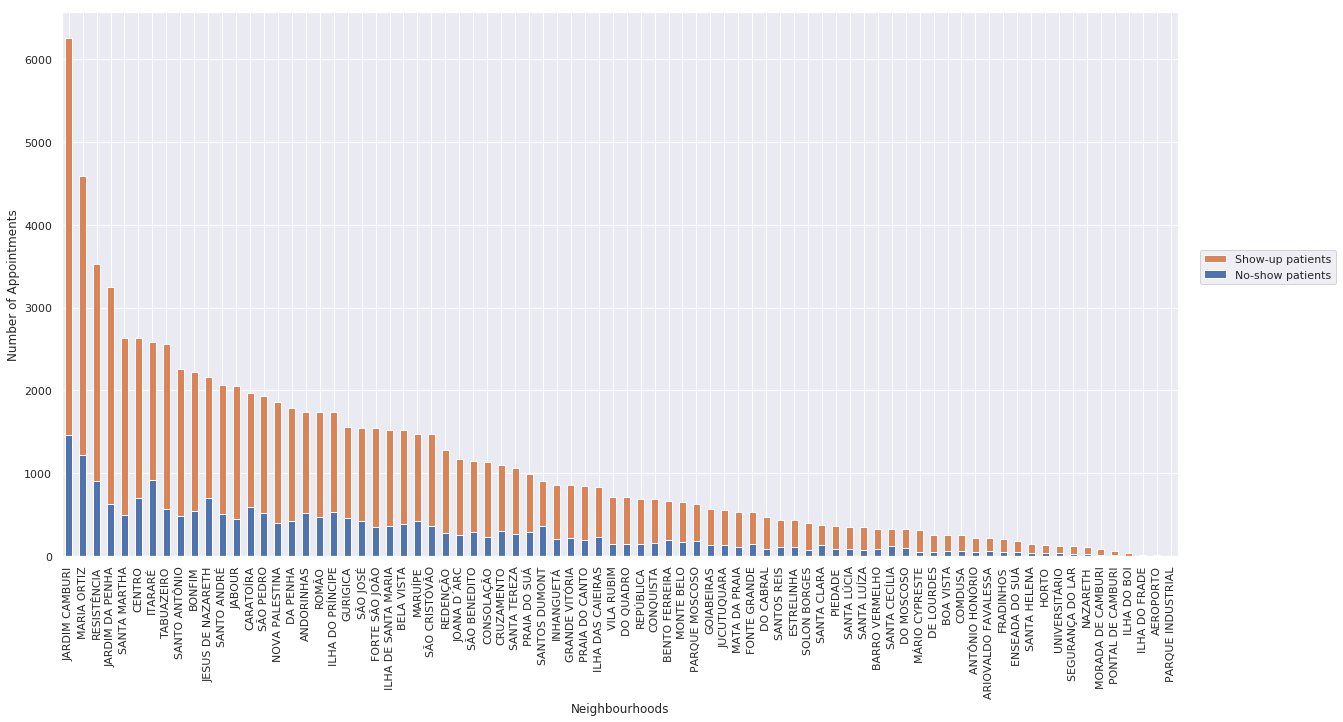

In [1240]:
# get the data how many missing and not missing appointments were in clinics 
# of each neighbourhoods in absolute numbers;
df_neigh_abs=df.groupby(['neighbourhood','no_show']).count().patient_id.unstack()
df_neigh_abs['No-show patients'] = df_neigh_abs['Yes']
df_neigh_abs['Show-up patients'] = df_neigh_abs['No']
df_neigh_abs.drop(['Yes','No'], axis=1, inplace=True)
df_neigh_abs = df_neigh_abs.sort_values('Show-up patients', ascending = False).head(80)

# visualize the result;
df_neigh_abs['Show-up patients'].plot(kind='bar', figsize=(20,10), color='#db8457');
df_neigh_abs['No-show patients'].plot(kind='bar', figsize=(20,10), color='#4e73ae');
plt.xlabel('Neighbourhoods');
plt.ylabel('Number of Appointments');
plt.legend(loc=(1.02, 0.50));

Jardim Camburi is also the neighbourhood whith clinics with the largest number of not missing appointments.

We also can explore in what neighbourhood there are clinics with the largest number of not missing appointments in proporitons.

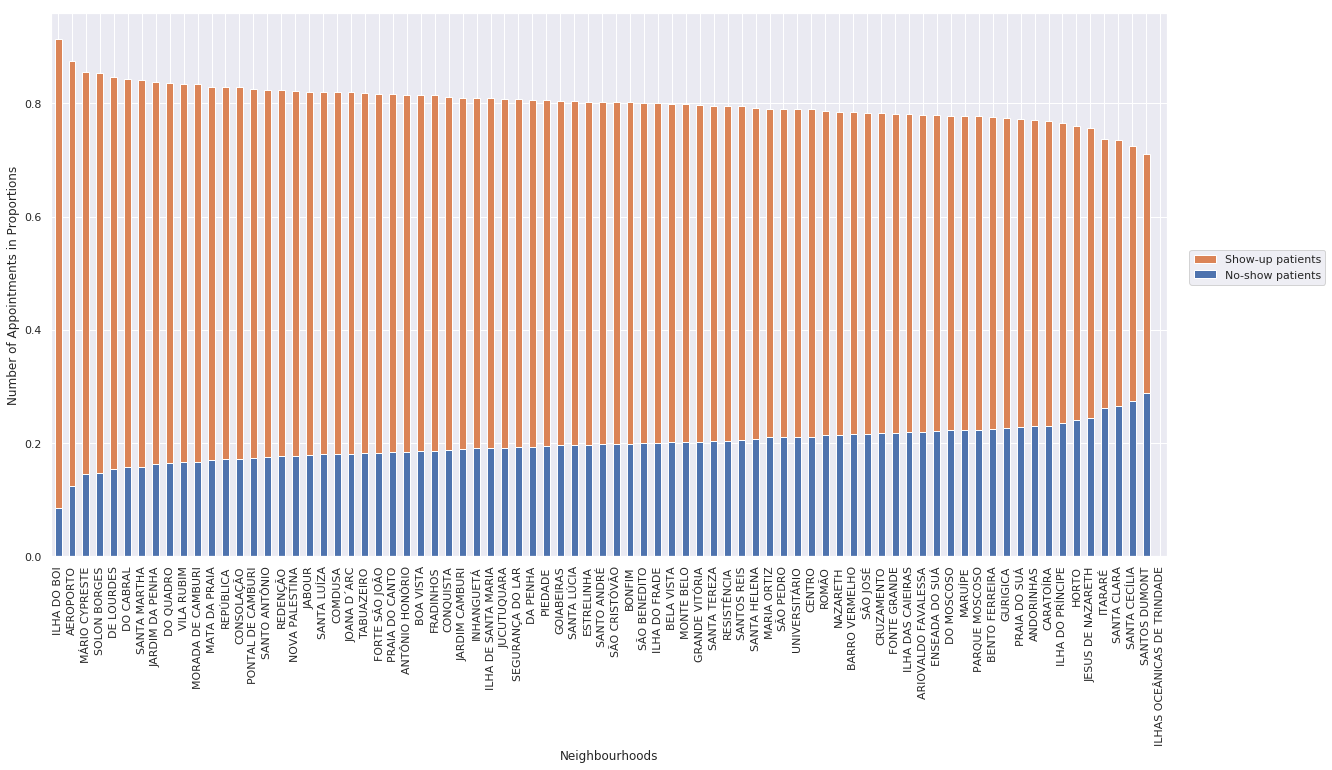

In [1241]:
# get the data how many missing and not missing appointments were in clinics of each neighbourhoods in proporitons;
df_neigh=df.groupby(['neighbourhood','no_show']).count().patient_id.unstack()
df_neigh['No-show patients'] = df_neigh['Yes'] / (df_neigh['Yes'] + df_neigh['No'])
df_neigh['Show-up patients'] = df_neigh['No'] / (df_neigh['Yes'] + df_neigh['No'])
df_neigh.drop(['Yes','No'], axis=1, inplace=True)
df_neigh = df_neigh.sort_values('Show-up patients', ascending = False).head(80)

# visualize the result;
df_neigh['Show-up patients'].plot(kind='bar', figsize=(20,10), color='#db8457');
df_neigh['No-show patients'].plot(kind='bar', figsize=(20,10), color='#4e73ae');
plt.xlabel('Neighbourhoods');
plt.ylabel('Number of Appointments in Proportions');
plt.legend(loc=(1.02, 0.50));

The neighbourhood with the largest number of not missing appointments in proportions is Ilha Do Boi.

# <a id="conclusions"></a>Conclusions

The analysis showed the following:

● In terms of age the greatest tendency to miss their appointments is shown by the young patients, the least - the patients aged 65 y.o. and above. The older the patients get, the less likely they miss the appointments, except for children under the age of 15 y.o. Since they usually visit doctors accompanied by their parents the relation between the missing and not missing appointments is equal the same relation for the patients aged 25-54 y.o.

● Women and men miss their appointments equally, however female patients are almost twice as many as male. This can be explained by the fact that women more often accompany their children to medical appointments than men.

● The most patients do not have the government financial aid Bolsa Familia and those of them who have tend to miss their appointments more often.

● Vast majority of the patients do not suffer from hypertension, diabetes, alcoholism and do not have any disabilities. The patients with hypertension, alcoholism and disabilities have tendency to miss their appointments more often than the parients who do not have these health issues, and the patients with diabetes on the contrary miss their appointments less often than the patients without diabetes.

● As opposed to what was expected the appointments which were preceded by sms reminders were missed noticeably more than the appointments without sms reminders.

● The average waiting time for the appointments is about 10 days although about 25% of the patients can visit their doctors on the same day. While the maximum waiting time is 179 days, 75% of the patients are waiting for the appointment not longer than 15 days. The patients who can visit clinics at the day when they scheduled the appointment tend to miss the appointments less often than the patients who have to wait longer. The patients who have to wait more than one week but less than one months miss their appointments more often than other patients. However, after a month of waiting the longer the patients wait the less they tend to miss the appointments.

● The neighbourhood where there are the clinics with the largest number of scheduled appointments and not missing appointments is Jardim Camburi. The neighbourhood with the largest number of not missing appointments in percentage terms is Ilha Do Boi.